<h1>Project Title: Finding Donors For a Charity Organization</h1>

<h3>Problem Statement</h3>

<p>Many non-profit organizations depend on donations and engagements with the donors to be able to fund the extensive efforts in the field to achieve the mission of the organization to make a meaningful impact in their community. However, a very common problem they face is being able to accurately predict if an individual will likely be a donor or not or how large a donation to request  as it is difficult to determine an individual’s general income bracket directly from public sources.</p>

<h3>Who To Approach For Donation</h3></br>

- We have a dataset of people we approached for donation for our STEM foundation
- We have the details of their sex, state of origin, education level, job, income, ethnicity, e.t.c
- We know income earners of above N50,000 monthly are better to approach for political donations.

<h3>Importing Necessary Libraries</h3>

In [193]:
import numpy as np
import pandas as pd
from time import time
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Importing the supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.model_selection import GridSearchCV


<h3>Loading The Dataset</h3>

In [84]:
record = pd.read_csv('record.csv')

In [85]:
# Displaying the first 5 records

record.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Igbo,Male,2174,0,40,Lagos,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Igbo,Male,0,0,13,Lagos,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Igbo,Male,0,0,40,Lagos,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Yoruba,Male,0,0,40,Lagos,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Yoruba,Female,0,0,40,Anambra,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Igbo,Female,0,0,40,Lagos,<=50K


<h3>Adding titles to the dataset </h3>

In [86]:
titles=["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","tribe","sex","capital-gain","capital-loss","hours-per-week","state-of-origin","amount"]

In [87]:
record = pd.read_csv('record.csv', names = titles)

In [88]:
# confirming the titles have been added to the dataset

record.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,tribe,sex,capital-gain,capital-loss,hours-per-week,state-of-origin,amount
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Igbo,Male,2174,0,40,Lagos,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Igbo,Male,0,0,13,Lagos,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Igbo,Male,0,0,40,Lagos,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Yoruba,Male,0,0,40,Lagos,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Yoruba,Female,0,0,40,Anambra,<=50K


In [89]:
record.shape

(32561, 15)

<h2>Exploring The Dataset</h2>
<h3>Dataset Features:</h3>
<p><b>age:</b> Age of prospective donor </p>
<p><b>workclass:</b> Work class of prospective donor </p>
<p><b>education:</b> Education level of prospective donor </p>
<p><b>education-num:</b> Number of educational years completed by prospective donor </p>
<p><b>Marital Status:</b> Marital status of prospective donor </p>
<p><b>Occupation:</b> Occupation of prospective donor </p>
<p><b>relationship:</b> Relationship status of prospective donor </p>
<p><b>Tribe:</b> Prospective donor's tribe </p>
<p><b>Sex:</b> Prospective donor's sex </p>
<p><b>Capital-gain:</b> Prospective donor's monetary capital gain </p>
<p><b>Capital-loss:</b> Prospective donor's monetary capital loss </p>
<p><b>hours-per-week:</b> Average working hours per week </p>
<p><b>State of Origin:</b> Prospective donor's state of origin </p>


In [90]:
record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        32561 non-null  object
 2   fnlwgt           32561 non-null  int64 
 3   education        32561 non-null  object
 4   education-num    32561 non-null  int64 
 5   marital-status   32561 non-null  object
 6   occupation       32561 non-null  object
 7   relationship     32561 non-null  object
 8   tribe            32561 non-null  object
 9   sex              32561 non-null  object
 10  capital-gain     32561 non-null  int64 
 11  capital-loss     32561 non-null  int64 
 12  hours-per-week   32561 non-null  int64 
 13  state-of-origin  32561 non-null  object
 14  amount           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.6+ MB


<h3>Finding unique values per attribute</h3>

In [91]:
print('workclass: ', record['workclass'].unique(), '\n')
print('---------------------------------------------')
print('education: ', record['education'].unique(), '\n')
print('---------------------------------------------')
print('education-num: ', record['education-num'].unique(), '\n')
print('---------------------------------------------')
print('marital-status: ', record['marital-status'].unique(), '\n')
print('---------------------------------------------')
print('occupation: ', record['occupation'].unique(), '\n')
print('---------------------------------------------')
print('relationship: ', record['relationship'].unique(), '\n')
print('---------------------------------------------')
print('tribe: ', record['tribe'].unique(), '\n')
print('---------------------------------------------')
print('sex: ', record['sex'].unique(), '\n')
print('---------------------------------------------')
print('state-of-origin: ', record['state-of-origin'].unique(), '\n')
print('---------------------------------------------')
print('amount: ', record['amount'].unique(), '\n')

workclass:  [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

---------------------------------------------
education:  [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

---------------------------------------------
education-num:  [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 

---------------------------------------------
marital-status:  [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 

---------------------------------------------
occupation:  [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-s

In [92]:
record[200:300]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,tribe,sex,capital-gain,capital-loss,hours-per-week,state-of-origin,amount
200,26,Private,397317,Masters,14,Never-married,Prof-specialty,Not-in-family,Igbo,Female,0,1876,40,Lagos,<=50K
201,19,?,170653,HS-grad,9,Never-married,?,Own-child,Igbo,Male,0,0,40,Delta,<=50K
202,51,Private,259323,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Igbo,Male,0,0,50,Lagos,>50K
203,42,Local-gov,254817,Some-college,10,Never-married,Prof-specialty,Not-in-family,Igbo,Female,0,1340,40,Lagos,<=50K
204,37,State-gov,48211,HS-grad,9,Divorced,Adm-clerical,Unmarried,Igbo,Female,0,0,35,Lagos,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,65,Private,111095,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Igbo,Male,0,0,16,Lagos,<=50K
296,37,Self-emp-inc,57424,Bachelors,13,Divorced,Sales,Not-in-family,Igbo,Female,0,0,60,Lagos,<=50K
297,39,?,157443,Masters,14,Married-civ-spouse,?,Wife,Hausa,Female,3464,0,40,?,<=50K
298,24,Private,278130,HS-grad,9,Never-married,Craft-repair,Own-child,Igbo,Male,0,0,40,Lagos,<=50K


In [93]:
# Shows content on the row 201 of the workplace attribute

record['workclass'][201]

' ?'

In [94]:
#shows the data type

type(record['workclass'][201])

str

- This reveals there to be missing values in form of the sign ' ?'
- This missing values has its dataype in 'string'


# Exploring the dataset - Cleaning the dataset

<h3>Sorting out missing values</h3>

In [95]:
#replacing the missing values ('?') with 'NaN' 

new_record = record.replace(' ?', np.NaN)

In [96]:
#confirming the replace is successful
new_record['workclass'][201]

nan

In [97]:
#converting the dataset to a numpy array

numpy_record = new_record.to_numpy()

In [98]:
# Using simple inputer to converyt the NaN values to the most frequent value on the attribute column

imp = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')

In [99]:
record_clean = imp.fit_transform(numpy_record)

In [100]:
record_clean = pd.DataFrame(data=record_clean, columns=titles)

In [101]:
# Viewing the new dataframe without missing values - row number 201 as case study

record_clean[200:300]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,tribe,sex,capital-gain,capital-loss,hours-per-week,state-of-origin,amount
200,26,Private,397317,Masters,14,Never-married,Prof-specialty,Not-in-family,Igbo,Female,0,1876,40,Lagos,<=50K
201,19,Private,170653,HS-grad,9,Never-married,Prof-specialty,Own-child,Igbo,Male,0,0,40,Delta,<=50K
202,51,Private,259323,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Igbo,Male,0,0,50,Lagos,>50K
203,42,Local-gov,254817,Some-college,10,Never-married,Prof-specialty,Not-in-family,Igbo,Female,0,1340,40,Lagos,<=50K
204,37,State-gov,48211,HS-grad,9,Divorced,Adm-clerical,Unmarried,Igbo,Female,0,0,35,Lagos,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,65,Private,111095,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Igbo,Male,0,0,16,Lagos,<=50K
296,37,Self-emp-inc,57424,Bachelors,13,Divorced,Sales,Not-in-family,Igbo,Female,0,0,60,Lagos,<=50K
297,39,Private,157443,Masters,14,Married-civ-spouse,Prof-specialty,Wife,Hausa,Female,3464,0,40,Lagos,<=50K
298,24,Private,278130,HS-grad,9,Never-married,Craft-repair,Own-child,Igbo,Male,0,0,40,Lagos,<=50K


In [102]:
#confirming the replace is successful - row number 201 as case study

record_clean['workclass'][201]

' Private'

# Data Exploration

<h3>Data Exploration - Data Implementation</h3>

<p>We are about to find out what percentage of the prospective donors that is making more than N50,000 monthly. The following will need to be computed:</p>

- The total number of records. 'n_record'
- The total number of people making more than N50,000 monthly, 'n_greater_N50k'
- The total number of people making at most N50,000 monthly, 'n_at_most_N50k'
- The percentage of people making more than N50,000 monthly, 'greater_percent'

In [103]:
# Total number of records:
total_record = record_clean.shape[0]
print("Total number of records: {}".format(total_record))

# Total number of people making more than N50,000 monthly
total_greater_N50k = record_clean.amount[record_clean['amount'] == ' >50K'].shape[0]
print("People making more than N50,000: {}".format(total_greater_N50k))

#Total number of people making at most N50,000 monthly
total_at_most_N50k = total_record - total_greater_N50k
print("People making at most N50,000 monthly: {}".format(total_at_most_N50k))

#Percentage of people whose income is more than N50,000 monthly
percent_greater_N50k = (total_greater_N50k / total_record)*100
print("Percentage of people making more than N50,000: {:.2f}%".format(percent_greater_N50k))

Total number of records: 32561
People making more than N50,000: 7841
People making at most N50,000 monthly: 24720
Percentage of people making more than N50,000: 24.08%


<h2> Data Visualization </h2>

<h3> plotting individual's education level with respect to their sex </h3>

C:\Users\mujidat\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


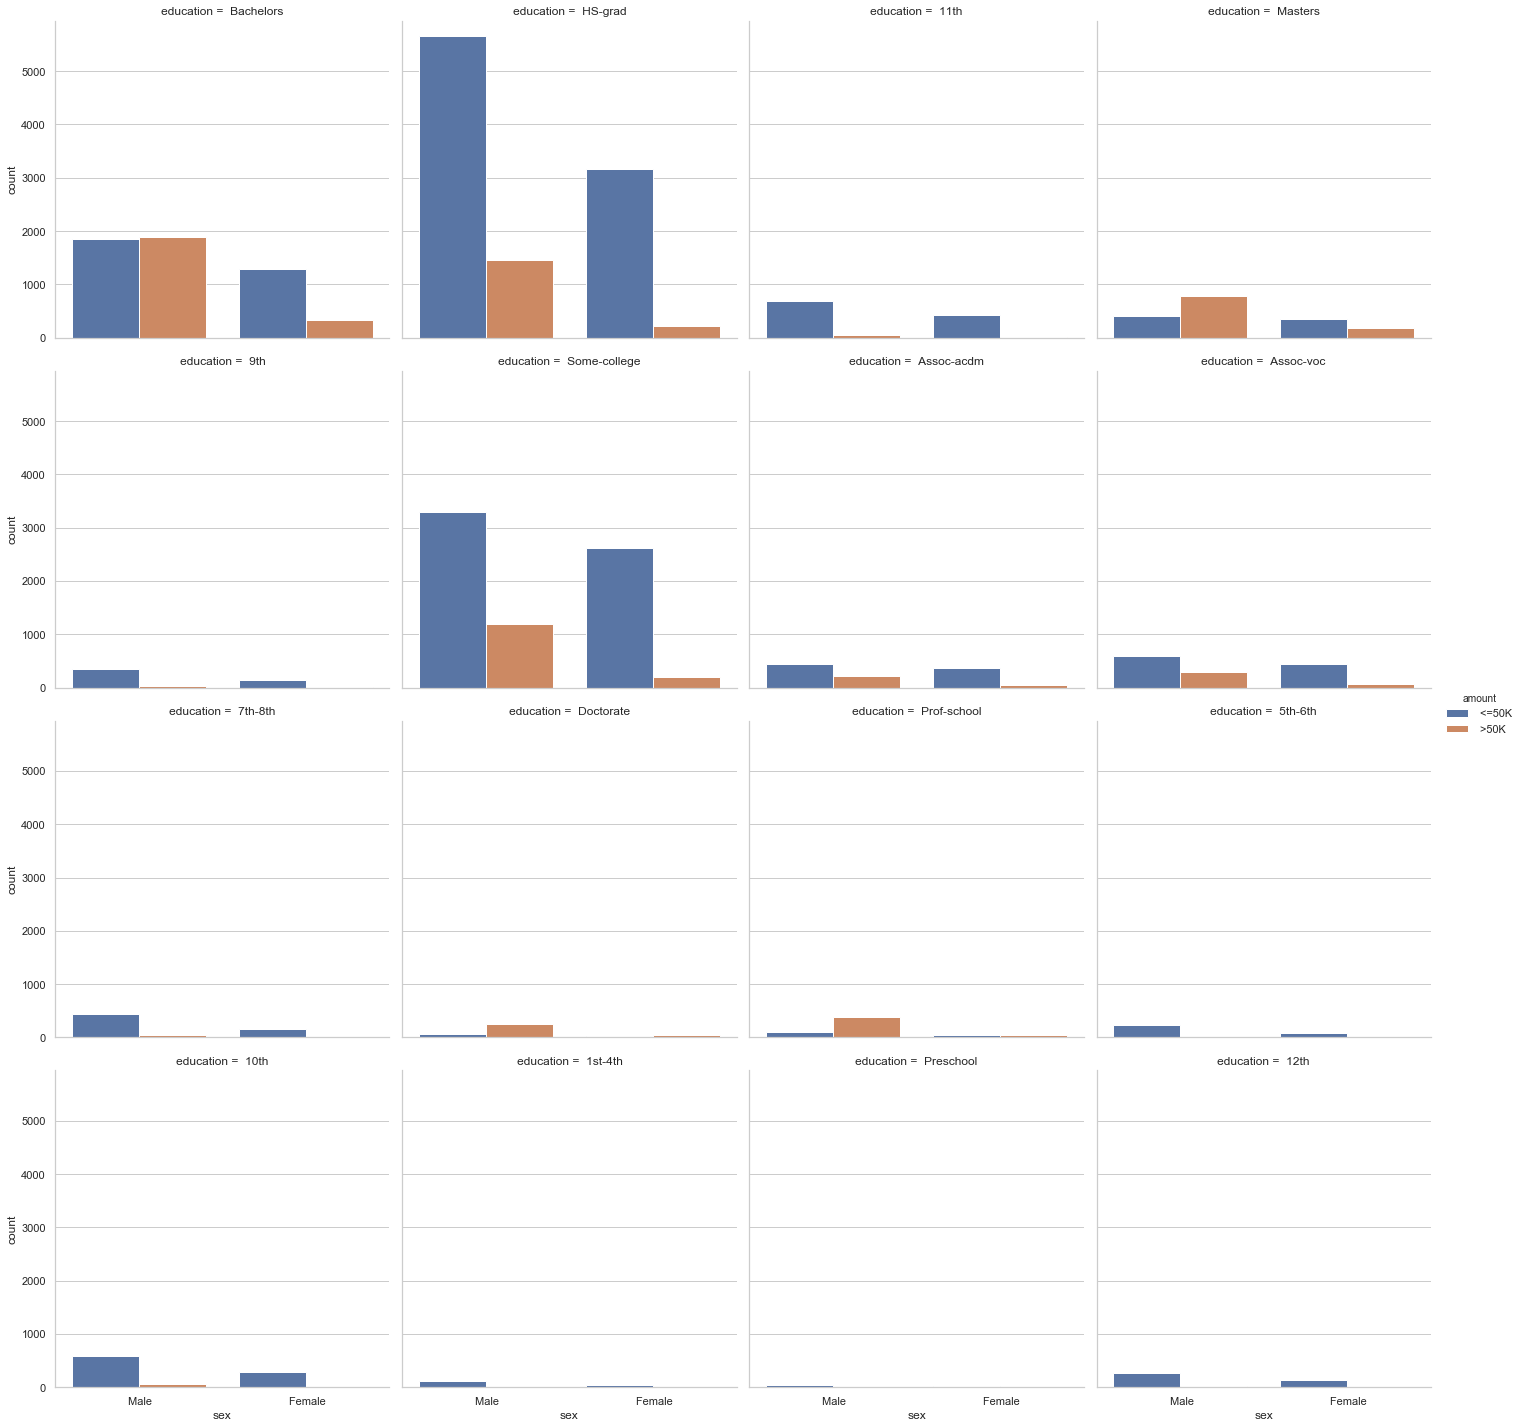

In [104]:
sns.set(style= 'whitegrid', color_codes=True)
sns.factorplot("sex", col="education", data=record, hue='amount', kind="count", col_wrap=4)

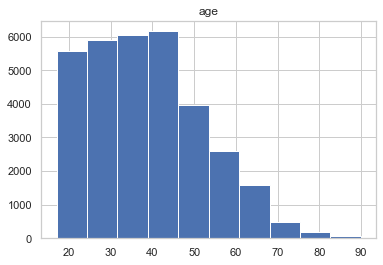

In [105]:
record.hist(column='age')
plt.show()

- ages of prospective donors is between 17 years and 90 years old and most of them are between the ages 39 and 47 years old

<h3>Plotting the relationship between the attributes and income </h3>


Text(0.5, 0.98, "Barplots between income and the dataset's attributes")

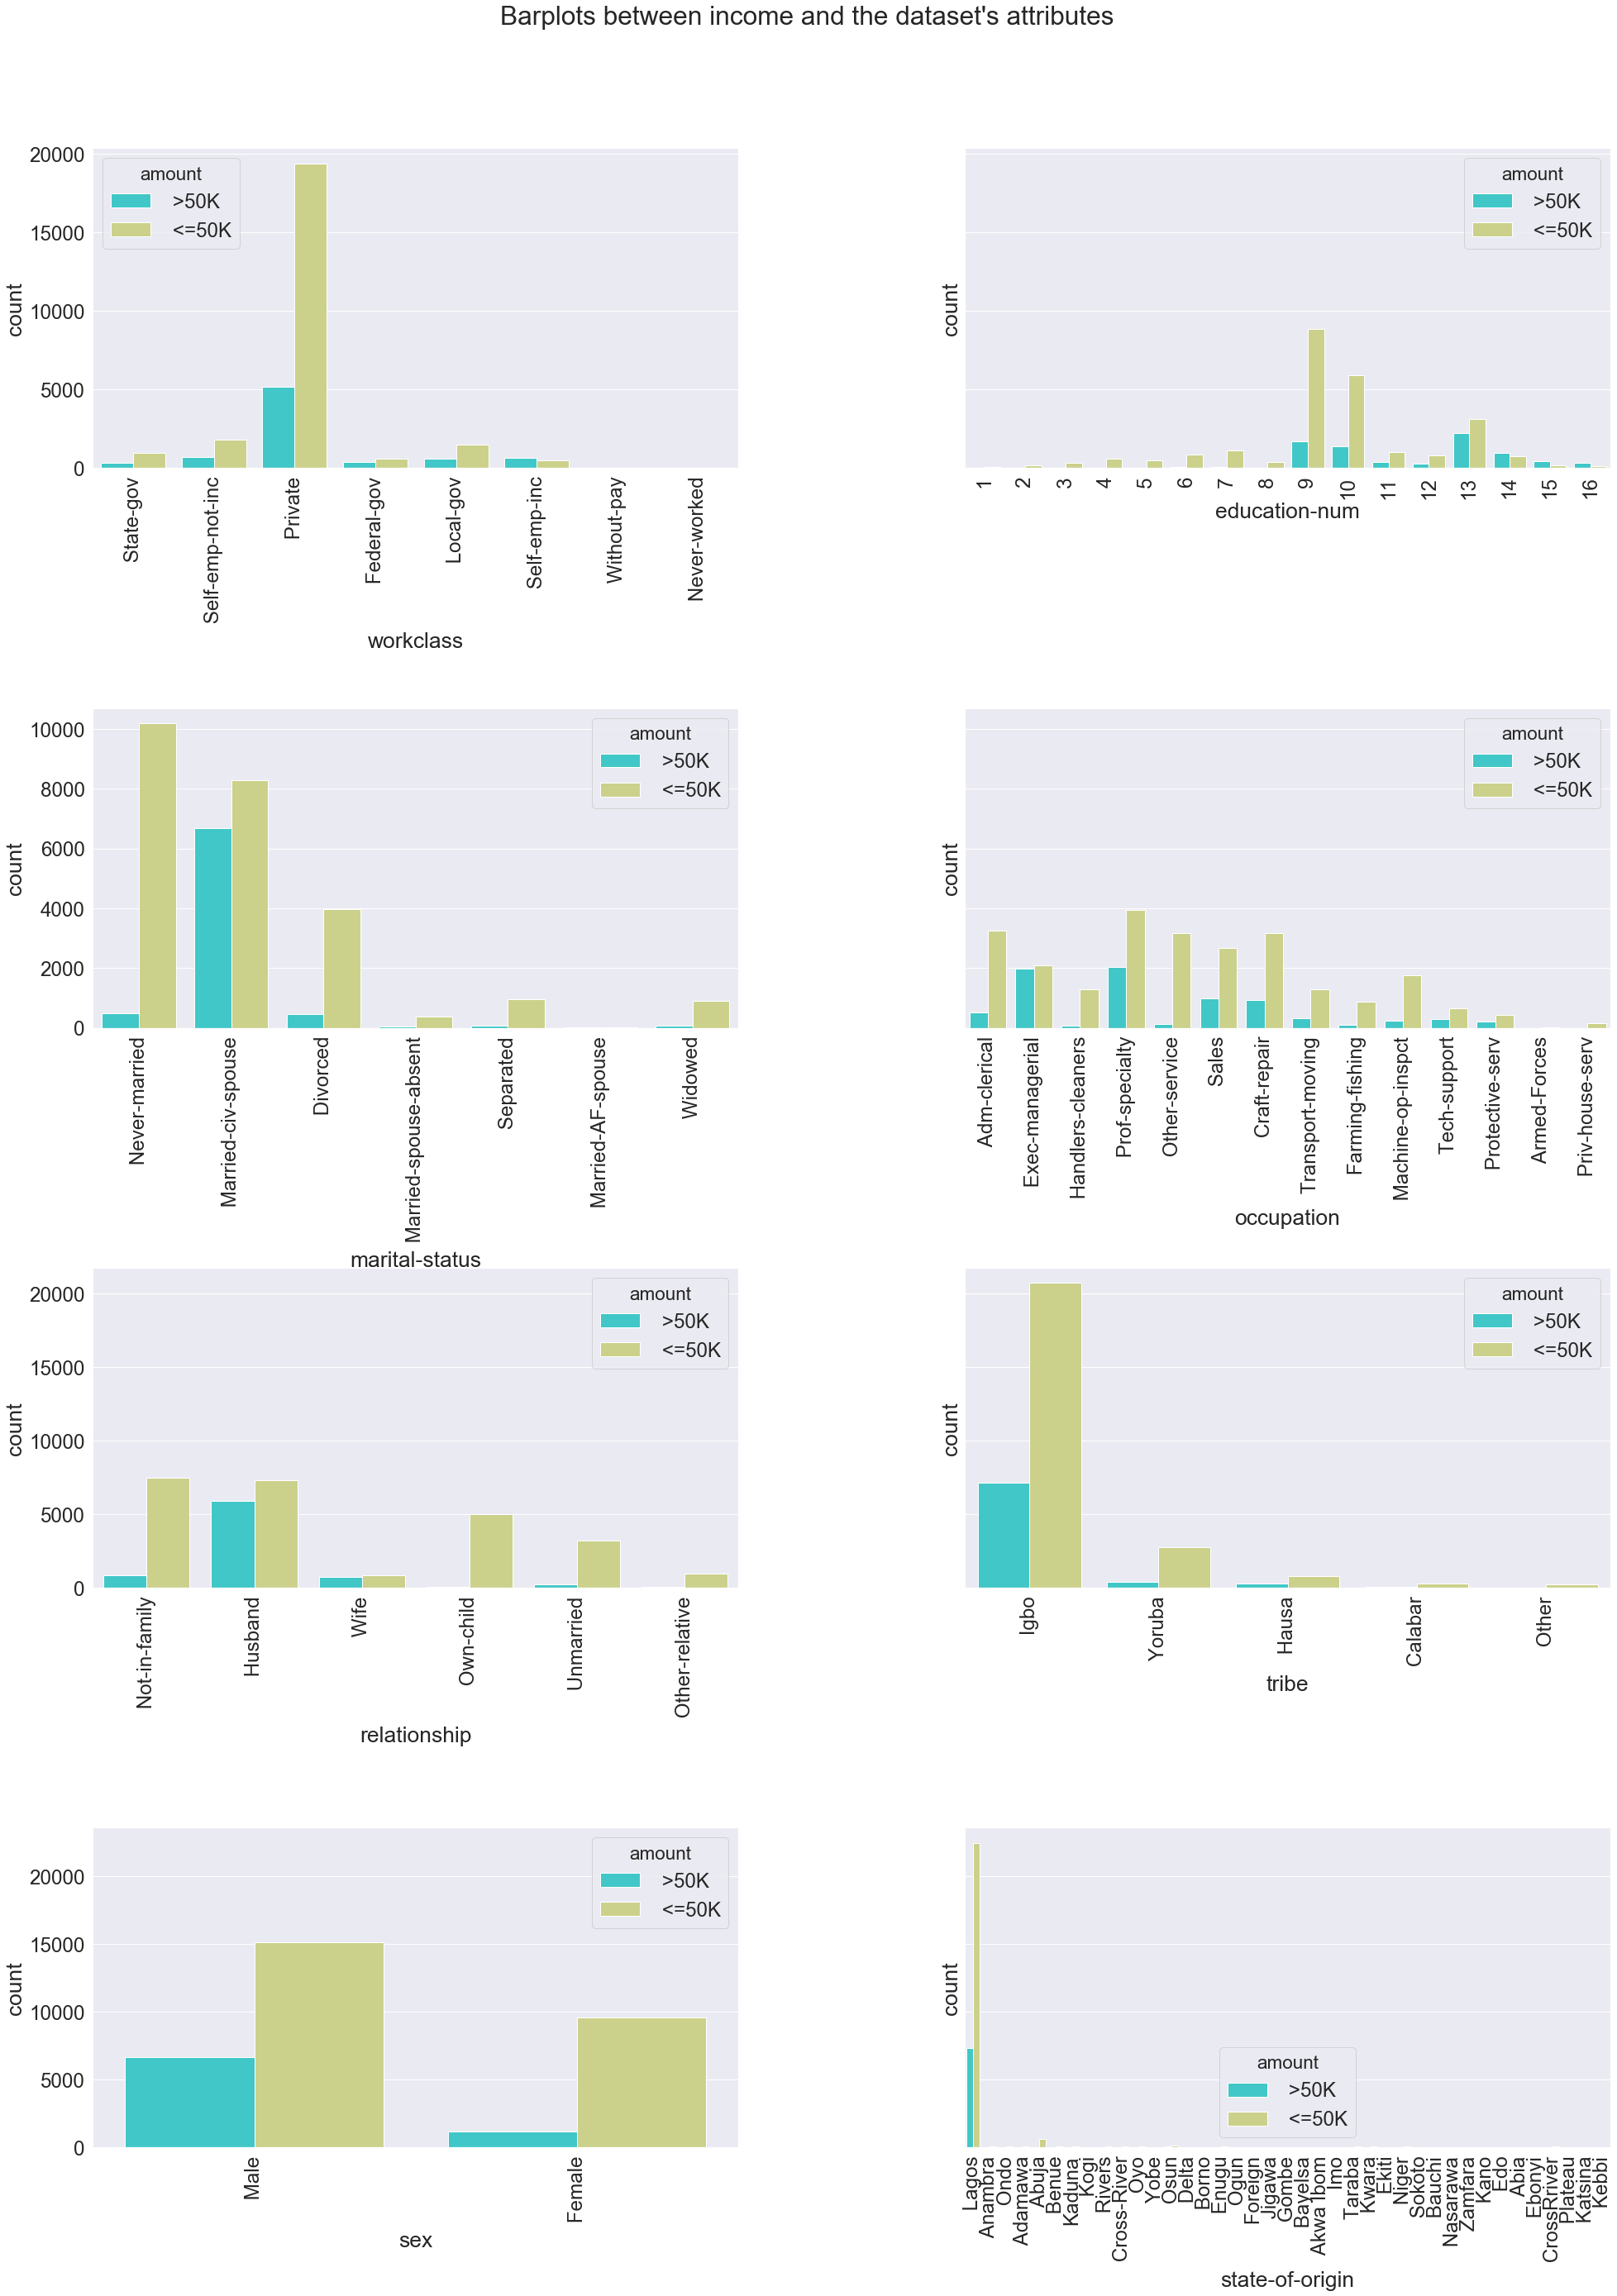

In [106]:
n_record = len(record_clean)
sns.set(font_scale = 2.2) 
fig, ((axis1, axis2), (axis3, axis4), (axis5, axis6), (axis7, axis8)) = plt.subplots(4, 2, sharey='row',figsize=(30,40))

g = sns.countplot(x="workclass",hue="amount", data=record_clean,ax=axis1,palette="rainbow",hue_order=[" >50K"," <=50K"])
for item in g.get_xticklabels():
    item.set_rotation(90)

g = sns.countplot(x="education-num",hue="amount", data=record_clean,ax=axis2,palette="rainbow",hue_order=[" >50K"," <=50K"])
for item in g.get_xticklabels():
    item.set_rotation(90)
    
g = sns.countplot(x="marital-status",hue="amount", data=record_clean,ax=axis3,palette="rainbow",hue_order=[" >50K"," <=50K"])
for item in g.get_xticklabels():
    item.set_rotation(90)
    
g = sns.countplot(x="occupation",hue="amount", data=record_clean,ax=axis4,palette="rainbow",hue_order=[" >50K"," <=50K"])
for item in g.get_xticklabels():
    item.set_rotation(90)
    
g = sns.countplot(x="relationship",hue="amount", data=record_clean,ax=axis5,palette="rainbow",hue_order=[" >50K"," <=50K"])
for item in g.get_xticklabels():
    item.set_rotation(90)

g = sns.countplot(x="tribe",hue="amount", data=record_clean,ax=axis6,palette="rainbow",hue_order=[" >50K"," <=50K"])
for item in g.get_xticklabels():
    item.set_rotation(90)
    
g = sns.countplot(x="sex",hue="amount", data=record_clean,ax=axis7,palette="rainbow",hue_order=[" >50K"," <=50K"])
for item in g.get_xticklabels():
    item.set_rotation(90)

g = sns.countplot(x="state-of-origin",hue="amount", data=record_clean,ax=axis8,palette="rainbow",hue_order=[" >50K"," <=50K"])
for item in g.get_xticklabels():
    item.set_rotation(90)

    
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.75, wspace=0.35)
plt.suptitle("Barplots between income and the dataset's attributes")

In [107]:
record_clean.dtypes

age                object
workclass          object
fnlwgt             object
education          object
education-num      object
marital-status     object
occupation         object
relationship       object
tribe              object
sex                object
capital-gain       object
capital-loss       object
hours-per-week     object
state-of-origin    object
amount             object
dtype: object

In [108]:
record_clean = record_clean.infer_objects()

In [109]:
record_clean.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
tribe              object
sex                object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
state-of-origin    object
amount             object
dtype: object

<h3>Correlation Analysis Between the numerical Attributes</h3>

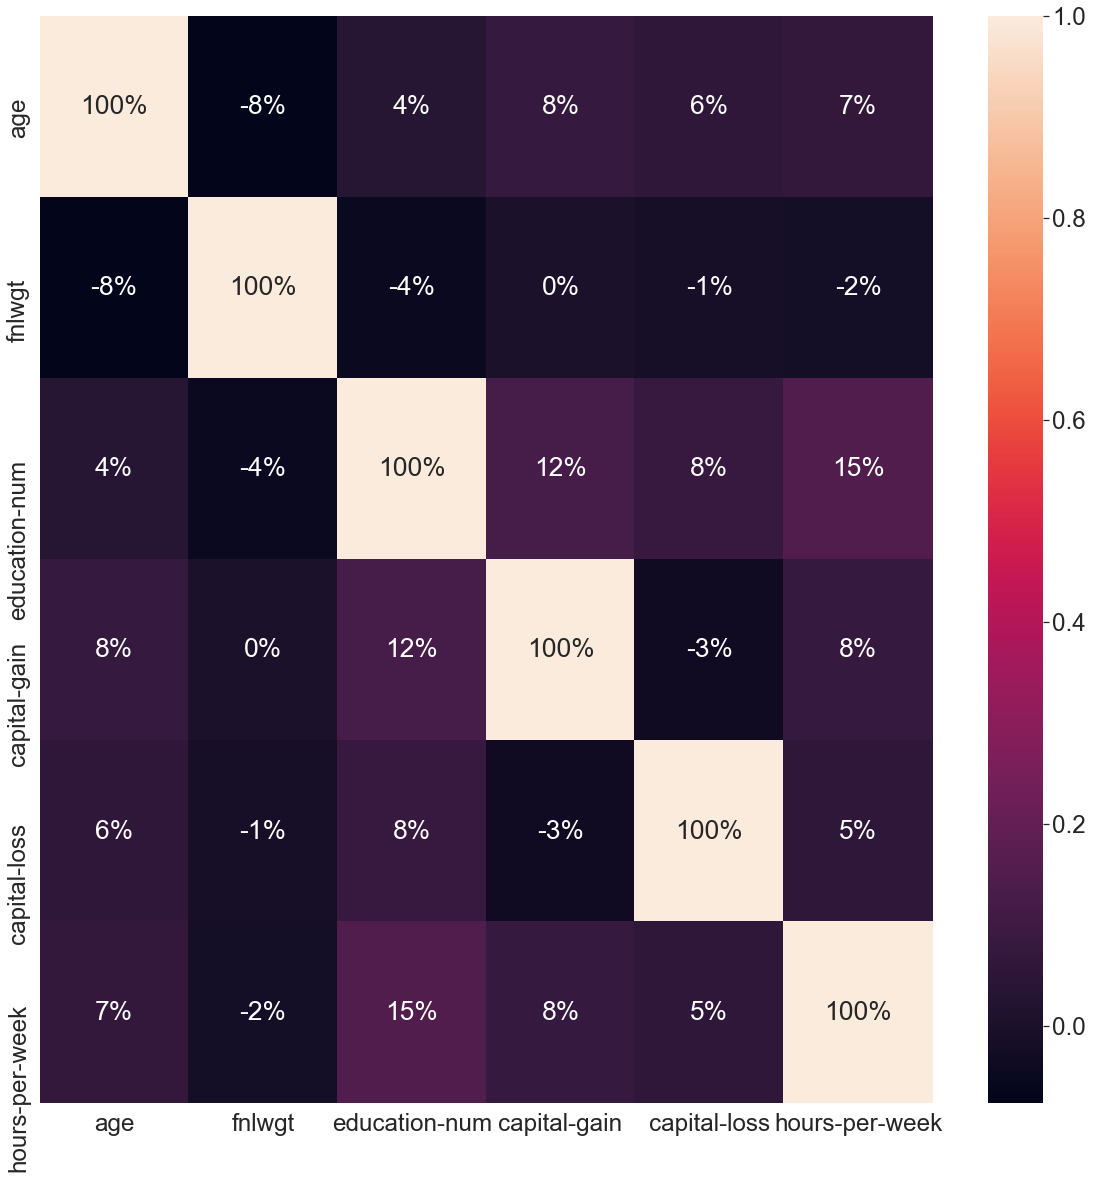

In [110]:
plt.figure(figsize=(20,20))
sns.heatmap(record_clean.corr(), annot=True, fmt='.0%')

Observation from the analysis above shows that the following below has a high correlation with the target variable(amount) because:

- Age: Older people with more experience will get a higher pay compared to younger people with less experience
- Education-num: The higher the level of education, the better the chances of getting a high pay
- Capital-gain: Has a strong effect on the individual's salary
- Hours-per-week: The more the number of working hour, the higher the pay

# Preparing The Dataset For Modelling

<h3>Encoding our numerical data type </h3>

In [111]:
#initializing a scaler, then apply it to the attributes
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

#making a copy of the original data
new_record = pd.DataFrame(data=record_clean)

#scale our numerical data
new_record[numerical]= scaler.fit_transform(new_record[numerical])

In [112]:
new_record.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,tribe,sex,capital-gain,capital-loss,hours-per-week,state-of-origin,amount
0,0.301370,State-gov,77516,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,Igbo,Male,0.02174,0.0,0.397959,Lagos,<=50K
1,0.452055,Self-emp-not-inc,83311,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,Igbo,Male,0.00000,0.0,0.122449,Lagos,<=50K
2,0.287671,Private,215646,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,Igbo,Male,0.00000,0.0,0.397959,Lagos,<=50K
3,0.493151,Private,234721,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Yoruba,Male,0.00000,0.0,0.397959,Lagos,<=50K
4,0.150685,Private,338409,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Yoruba,Female,0.00000,0.0,0.397959,Anambra,<=50K


<h3> Seperating the dataset into independent and dependent variables

In [113]:
#independent variable:

y = new_record['amount']

In [114]:
#dependent variables:

new_record.drop('amount', axis = 1, inplace= True)

<h3>Applying label encoder on the target variable </h3>

In [115]:
y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: amount, Length: 32561, dtype: object

In [116]:
encoder = LabelEncoder()
y = y.apply(lambda x:0 if x== ' <=50K' else 1)

In [117]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: amount, Length: 32561, dtype: int64

In [118]:
#viewing the dependent variables

new_record

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,tribe,sex,capital-gain,capital-loss,hours-per-week,state-of-origin
0,0.301370,State-gov,77516,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,Igbo,Male,0.021740,0.0,0.397959,Lagos
1,0.452055,Self-emp-not-inc,83311,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,Igbo,Male,0.000000,0.0,0.122449,Lagos
2,0.287671,Private,215646,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,Igbo,Male,0.000000,0.0,0.397959,Lagos
3,0.493151,Private,234721,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Yoruba,Male,0.000000,0.0,0.397959,Lagos
4,0.150685,Private,338409,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Yoruba,Female,0.000000,0.0,0.397959,Anambra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,Private,257302,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,Igbo,Female,0.000000,0.0,0.377551,Lagos
32557,0.315068,Private,154374,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,Igbo,Male,0.000000,0.0,0.397959,Lagos
32558,0.561644,Private,151910,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,Igbo,Female,0.000000,0.0,0.397959,Lagos
32559,0.068493,Private,201490,HS-grad,0.533333,Never-married,Adm-clerical,Own-child,Igbo,Male,0.000000,0.0,0.193878,Lagos


<h3>We need to encode the categorical variables using hot encoding </h3>

In [119]:
X = pd.get_dummies(new_record)

In [120]:
X

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,state-of-origin_ Ondo,state-of-origin_ Osun,state-of-origin_ Oyo,state-of-origin_ Plateau,state-of-origin_ Rivers,state-of-origin_ Sokoto,state-of-origin_ Taraba,state-of-origin_ Yobe,state-of-origin_ Zamfara,state-of-origin_Kaduna
0,0.301370,77516,0.800000,0.021740,0.0,0.397959,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.452055,83311,0.800000,0.000000,0.0,0.122449,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.287671,215646,0.533333,0.000000,0.0,0.397959,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.493151,234721,0.400000,0.000000,0.0,0.397959,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.150685,338409,0.800000,0.000000,0.0,0.397959,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,257302,0.733333,0.000000,0.0,0.377551,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
32557,0.315068,154374,0.533333,0.000000,0.0,0.397959,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
32558,0.561644,151910,0.533333,0.000000,0.0,0.397959,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
32559,0.068493,201490,0.533333,0.000000,0.0,0.193878,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [121]:
list(X)

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Never-worked',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'education_ 10th',
 'education_ 11th',
 'education_ 12th',
 'education_ 1st-4th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Preschool',
 'education_ Prof-school',
 'education_ Some-college',
 'marital-status_ Divorced',
 'marital-status_ Married-AF-spouse',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Married-spouse-absent',
 'marital-status_ Never-married',
 'marital-status_ Separated',
 'marital-status_ Widowed',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-re

<h3>Splitting the dataset into 80% training and 20% testing </h3>

In [122]:
#splitting the independent and the dependent variable into training and testing set

X_train, X_test, y_train , y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [123]:
# Showing the results of the split

print("Training set has {} samples".format(X_train.shape[0]))
print("Testing set has {} samples".format(X_test.shape[0]))

Training set has 26048 samples
Testing set has 6513 samples


<h2>Choosing The Right Model For Machine Learning </h2>

We will be testing our dataset using three different types of supervised learning algorithms. After which we will determine which is best for modelling the data. The algorithms are:
- Logistic Regression
- Decision Tree Classifier

<h3> Logistic Regression </h3>

In [162]:
#Training the model

log = LogisticRegression()
log.fit(X_train, y_train)

C:\Users\mujidat\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [186]:
print(log.score(X_train, y_train))

0.7602119164619164


In [173]:
#Predicting on the test data

log_prediction = log.predict(X_test)

In [174]:
log_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [175]:
y_test

22278    0
8950     0
7838     0
16505    0
19140    1
        ..
7694     1
10410    0
1043     1
30860    0
12467    1
Name: amount, Length: 6513, dtype: int64

In [176]:
accuracy_log = accuracy_score(log_prediction, y_test)*100

In [177]:
accuracy_log

75.51051742668508

 <h3> Using Hyperparameter to increase the accuracy - On Logistic Regression Classsifier </h3>

In [132]:
#Hyper Tuning of Logistic Regression Classifier to Increase Model Accuracy

class_log = LogisticRegression(max_iter=1000)

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 0.1, 0.01, 0.001]
parameters = dict(solver = solvers, penalty = penalty, C = c_values)

class_log_grid = GridSearchCV(estimator = class_log, param_grid = parameters, cv = 5)
class_log_grid.fit(X_train, y_train)

C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn(

C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn(

C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn(

C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn(

C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn(

C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn(

C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn(

C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn(

C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn(

C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn(

C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\mujidat\anaconda3\lib

C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn(

C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn(

C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from conve

C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn(

C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn(

C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn(

C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn(

C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn(

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [100, 10, 0.1, 0.01, 0.001], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [133]:
class_log_grid.best_estimator_

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [187]:
class_log_grid.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}

In [188]:
log = LogisticRegression(C = 10, penalty = 'l2', solver= 'newton-cg')
log.fit(X_train, y_train)

print(log.score(X_train, y_train))

C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn(

0.8528101965601965


C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mujidat\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


In [189]:
#Predicting on the test data

new_record_grid_log = class_log_grid.predict(X_test)

In [190]:
#checking the accuracy:

accuracy_score(new_record_grid_log, y_test)*100

84.61538461538461

<h2>Score Report For Before & After Optimization (Logistic Regression Classifier) </h2>

In [191]:
# Report the before-and-afterscores

print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(log_prediction, y_test)*100))
print("F-score on testing data: {:.4f}".format(fbeta_score(log_prediction, y_test, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final Prediction score on the testing data: {:.4f}".format(log.score(X_train, y_train)*100))
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(new_record_grid_log, y_test)*100))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(new_record_grid_log, y_test, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 75.5105
F-score on testing data: 0.0000

Optimized Model
------
Final Prediction score on the testing data: 85.2810
Final accuracy score on the testing data: 84.6154
Final F-score on the testing data: 0.6179


C:\Users\mujidat\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


<h3><b>OBSERVATION:</b></h3>

<p>The optimized model's scores are better than the unoptimized model's scores. F-Score of optimized model is 0.6179 and Accuracy score is increased by 9.11%. 

<h3> Decision Tree Classifier </h3>

In [148]:
#Training the model

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [149]:
print(dt.score(X_train, y_train))

1.0


In [150]:
#Predicting on the test data

dt_prediction = dt.predict(X_test)

In [151]:
dt_prediction

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [152]:
y_test

22278    0
8950     0
7838     0
16505    0
19140    1
        ..
7694     1
10410    0
1043     1
30860    0
12467    1
Name: amount, Length: 6513, dtype: int64

In [165]:
accuracy_dt = accuracy_score(dt_prediction, y_test)*100

In [166]:
accuracy_dt

81.0379241516966

<h3> Using Hyperparameter to increase the accuracy - On Decision Tree Classsifier </h3>

In [155]:
#Hyper Tuning of Decision Tree Classifier to Increase Model Accuracy

class_dt = DecisionTreeClassifier()

parameters = {'min_samples_split':range(10,500,20), 'max_depth': range(1,20,2), 'criterion':['gini', 'entropy']}

class_dt_grid = GridSearchCV (class_dt, parameters, cv = 5)
class_dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20, 2),
                      

In [156]:
class_dt_grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=19,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=410,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [157]:
class_dt_grid.best_params_

{'criterion': 'entropy', 'max_depth': 19, 'min_samples_split': 410}

In [158]:
#Training the model with the best parameters

dt = DecisionTreeClassifier(min_samples_split = 410, max_depth = 19, criterion = 'entropy')
dt.fit(X_train, y_train)

print(dt.score(X_train, y_train))

0.867014742014742


In [159]:
new_record_grid_dt = class_dt_grid.predict(X_test)

In [160]:
#checking the accuracy:

accuracy_score(new_record_grid_dt, y_test)*100

85.36772608628897

<h2>Score Report For Before & After Optimization (Decision Tree Classifier) </h2>

In [184]:

print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(dt_prediction, y_test)*100))
print("F-score on testing data: {:.4f}".format(fbeta_score(dt_prediction, y_test, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final Prediction Score on testing data: {:.4f}".format(dt.score(X_train, y_train)*100))
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(new_record_grid_dt, y_test)*100))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(new_record_grid_dt, y_test, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 81.0379
F-score on testing data: 0.6258

Optimized Model
------
Final Prediction Score on testing data: 86.7015
Final accuracy score on the testing data: 85.3677
Final F-score on the testing data: 0.6370


<h3><b>OBSERVATION:</b></h3>

<p>The optimized model's scores are better than the unoptimized model's scores. F-Score increased by 0.01 and Accuracy score increased by 4.33%. However, both optimized and unoptimized scores are way better than the logistic regression classifier.</p>

<h2> Conclusion - Choosing The Best Model </h2>

<p>Out of the two model used, the best model for this dataset is the <b>Decision Tree Classifier</b>. Its F-score and accuracy metrics applied to the test set are the best compare to the other classifier(Logistic Regression). It shows that Decision Tree Classifier outperformed the other model. In summary, As compare to other model, Decision Tree Classifier is the best suitable for identifying individuals that make more than N50,000 monthly as it outperformed the other model in <b>Prediction score, F-score and Accuracy score.</b> </p>